# The Energy of a Quantum Physical Two-Body System

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

## Constants

In [2]:
# sigma = 1
# x0 = 0

#planck = 6.626e-34
#reduced_planck = planck/(2*np.pi)
#e_mass = 9.109e-31


## Discretization

In [3]:
# Length of interval
L = 10
# No. of subintervals
N = 200
# Stepsize
h = L / N

# Argument vector
xi = np.linspace(-L/2, L/2, N)

## Functions

In [4]:
def v_func(x):
    """Returns the potential function of the quantum system"""
    return x**2/2

In [5]:
def psi_func(x, x0, sigma):
    """Returns the wave function"""
    return np.sqrt(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-x0)**2/(4*sigma**2))

In [6]:
def finite_difference_scheme():
    """Returns a matrix representation of a second order central finite difference scheme"""
    m = np.zeros((N,N))
    for i in range(N):
        m[i,i] = -2
        if i+1 < N:
            m[i,i+1] = 1
        if i-1 >= 0:
            m[i, i-1] = 1
    return m

In [7]:
def compute_e(x0, sigma):
    """  """
    psi_vector = np.array(psi_func(xi, x0, sigma)).reshape(-1,1)
    
    #kinetic_constant = -reduced_planck**2/(2*e_mass) # Kan være 1 inntil videre
    h_psi = -1/2*(1/h**2)*(finite_difference_matrix @ psi_vector) + (v_vector * psi_vector)
     
    e = h*(psi_vector.T @ h_psi)  
    
    return e[0][0]

In [8]:
def finite_difference(x, y, isX=False):
    """Calculates the central finite difference approximation of a partial derivate with two variables"""
    if isX:
        return (compute_e(x+h, y) - compute_e(x-h, y))/2*h
   
    return (compute_e(x , y+h) - compute_e(x, y-h))/2*h

In [9]:
def gradient_step(x0, sigma):
    lr = 1
    # print(finite_difference_e(sigma, x0))
    new_x0 = x0 - lr*finite_difference(x0, sigma, isX=True)
    new_sigma = sigma - lr*finite_difference(x0, sigma, isX=False)
    return (new_x0, new_sigma)

In [10]:
def gradient_descent(x0, sigma):
    number_of_iterations = 0 
    max_iterations = 2000 # Maximum number of iterations
    e = compute_e(x0, sigma) # Initial calculation of energy level
    
    while (number_of_iterations < max_iterations): # Breaks loop if maximum iterations is reached
    
        new_x0, new_sigma = gradient_step(x0, sigma) # New values for x0 and sigma
        new_e = compute_e(new_x0, new_sigma) # New value for energy level
        
        if new_e > e: # Breaks out of loop if we start ascending
            break 
        
        x0, sigma, e =  new_x0, new_sigma, new_e # updates the variables with the new values
        gradient_path_list.append([x0, sigma, e]) # saving values for plotting
        number_of_iterations += 1
        
    print(f"Number of iterations: {number_of_iterations}")
    return x0, sigma

## Computing the Energy

Tweake parameter(lr, x0, sigma).
Lage plot
Sette stoppkriterier.


fasit
x0 = 0
sigma = 1/sqrt(2)
e = 0.5

In [11]:
# Initializing vectors
v_vector = np.array(v_func(xi)).reshape(-1, 1)
finite_difference_matrix = finite_difference_scheme()

In [12]:
x0 = -3
sigma = 2
gradient_path_list = []

e = compute_e(x0, sigma)
print(f"Energy at guess {e}")
new_x0, new_sigma = gradient_descent(x0, sigma) 
print(new_x0, new_sigma)
print(compute_e(new_x0, new_sigma))
print(compute_e(0, 1/np.sqrt(2)))

Energy at guess 4.7819643998818
Number of iterations: 2000
-0.060578262321217824 0.7105775533169961
0.5017536472660764
0.4999269895227437


In [13]:
# Forsøk på plotting:

X = np.arange(-15, 15, 0.5)
Y = np.arange(0.1, 5, 0.2)

E = np.array([[compute_e(x, y) for y in Y] for x in X])

X, Y = np.meshgrid(X, Y)

print(X.shape, Y.shape, E.shape)

(25, 60) (25, 60) (60, 25)


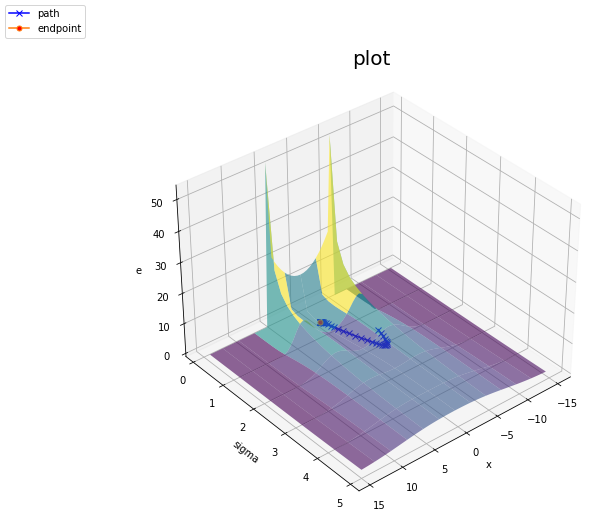

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
#ax = Axes3D(fig) #gml måte
ax.plot_surface(X, Y, Z=E.T, rstride=5, cstride=5, cmap='viridis', alpha = 0.6)

# Gradient descent plot
path_step_size = 50 # frequency of the ploting points
gradient_path_list = np.array(gradient_path_list) # transform the plot to a numpy array
ax.plot(gradient_path_list[::path_step_size,0], gradient_path_list[::path_step_size,1], 
        gradient_path_list[::path_step_size, 2], 'bx-', label='path')

ax.plot(gradient_path_list[-1:,0], gradient_path_list[-1:,1], 
        gradient_path_list[-1:, 2], markerfacecolor='r', marker='o', markersize=5, label='endpoint')

# Labels etc
ax.set_title('plot', fontdict={'fontsize': 20})
ax.set_xlabel('x')
ax.set_ylabel('sigma')
ax.set_zlabel('e')
ax.view_init(elev=35, azim=50)
fig.legend(loc='upper left')